<a href="https://colab.research.google.com/github/Bechir-karmeni/Bechir-karmeni/blob/main/Copie_de_NLP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec using Gensim

## Setup

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec 

In [ ]:
file = open("write.txt", "r") 
text = file.read()
text = text.replace("\n", " ") 

In [ ]:
data = [] 
# iterate through each sentence in the file 
for sentence in sent_tokenize(text): 
	temp = [] 
	
	# tokenize the sentence into words 
	for token in word_tokenize(sentence): 
		temp.append(token.lower()) 

	data.append(temp) 
 # Create Skip Gram model 
skipgram = gensim.models.Word2Vec(data, min_count = 3, size = 300, sg=1,  window = 2, iter=30)

In [ ]:
skipgram.wv['python']

In [ ]:
#similarity entre kilmet
skipgram.wv.most_similar('programming')

In [ ]:
#similarity entre joumal
skipgram.wv.wmdistance('interpreted', 'Functional')

0.20832881401048262

In [ ]:
# Create CBOW model 
cbow = gensim.models.Word2Vec(data, min_count = 3, negative=2,size = 300,  window = 1, iter=30) 

In [ ]:
cbow.wv['python']

In [ ]:
cbow.predict_output_word(['javascript', 'go']) #if error: replace skipgram

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

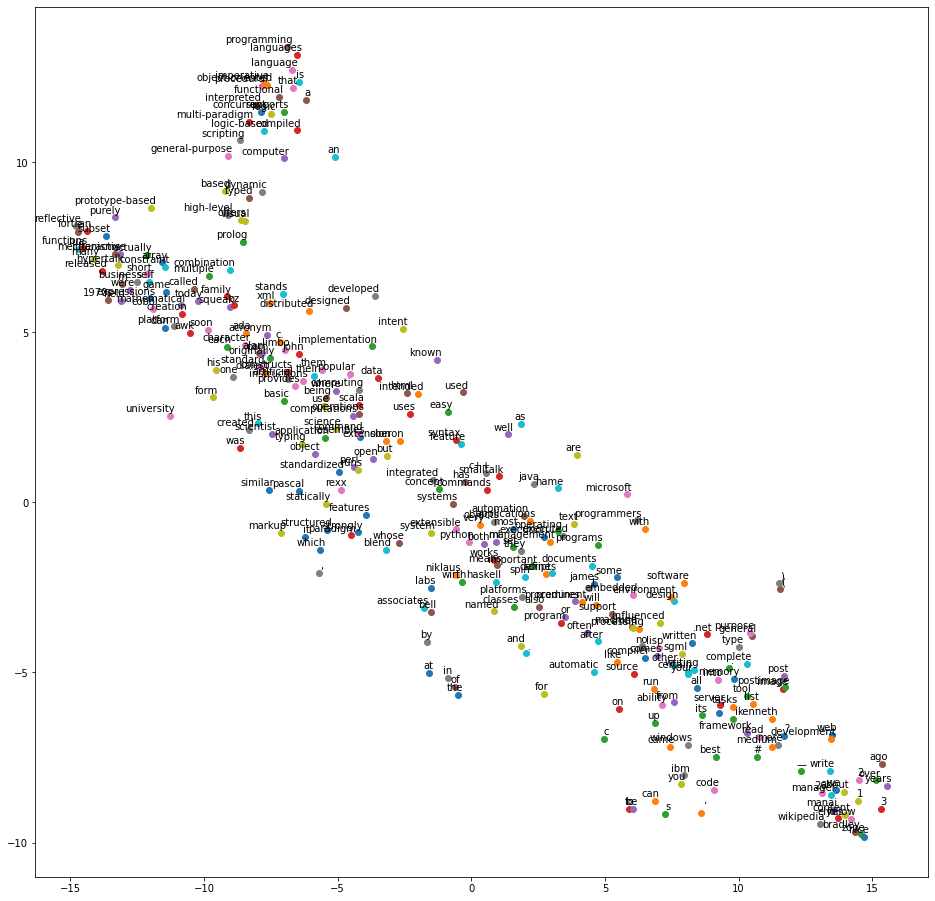

In [ ]:
tsne_plot(skipgram)

In [ ]:
skipgram.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")

# Fastext

In [ ]:
!pip install fasttext

In [ ]:
import fasttext

skip = fasttext.train_unsupervised('write.txt', model='skipgram', minCount = 1, epoch=30)
cbo = fasttext.train_unsupervised('write.txt', model='cbow', minCount = 1, epoch=30)

In [ ]:
skip['elyes']

array([ 0.2683656 ,  0.05148201, -0.01418739,  0.13081701,  0.04524667,
        0.07104816, -0.08095874, -0.06319287,  0.08283831,  0.02651327,
       -0.05785273,  0.09601735, -0.11286845, -0.05205126, -0.18234964,
       -0.03412448,  0.03249486, -0.14264962, -0.04425741,  0.0691637 ,
        0.0889427 , -0.02968799, -0.17722052, -0.02695522,  0.00697698,
        0.08271717,  0.25859076, -0.07964648, -0.0943497 ,  0.07045712,
        0.00773434, -0.00447244,  0.01246281, -0.10269683, -0.03095892,
       -0.1221394 , -0.072604  , -0.06097419, -0.12885736,  0.11999109,
        0.01500726,  0.11961351,  0.02819602,  0.02776231,  0.1202755 ,
       -0.17668012,  0.03418875, -0.00778169, -0.06024519,  0.11526927,
       -0.1511833 , -0.03268018,  0.02394231, -0.00735705,  0.06050782,
        0.04043565,  0.0177328 , -0.07281806,  0.00807287, -0.05811645,
       -0.09978643,  0.09249679,  0.21197201,  0.05379403,  0.09602676,
        0.07776574,  0.04319282, -0.0475433 ,  0.1258145 ,  0.09

In [ ]:
skip.get_nearest_neighbors('programming')

[(0.9999673366546631, 'Programming'),
 (0.9999664425849915, 'programming,'),
 (0.9999527335166931, 'programming.'),
 (0.9999107122421265, 'program'),
 (0.9998584985733032, 'multiprogramming'),
 (0.9998387694358826, 'metaprogramming'),
 (0.9998171925544739, 'programs'),
 (0.9997624158859253, 'programmer,'),
 (0.9997326135635376, 'programs.'),
 (0.9996792674064636, 'programmers')]